## Toxicity Baseline NB by Sub Categories
Competition location:  
https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification  
https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e

In [27]:
import numpy as np
import pandas as pd
import vocab as vocabulary
import collections
import utils
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
train = pd.read_csv('/data/ToxicityData/train.csv')
test = pd.read_csv('/data/ToxicityData/test.csv')

In [3]:
test.head()

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


### Tokenization
This can be as simple as calling string.split() - good enough for English and many European languages - but we could also do something more sophisticated here. There are various types of tokenizers:  
  
1. nltk.tokenize.treebank import TreebankWordTokenizer
2. nltk.tokenize import WhitespaceTokenizer

In [4]:
from nltk.tokenize import WhitespaceTokenizer
white_token = WhitespaceTokenizer()

In [5]:
from keras.preprocessing.text import Tokenizer
keras_token = Tokenizer()

Using TensorFlow backend.


In [6]:
V = 30000
SEED = 23
VAL_SPLIT = 0.3

#### First, tokenize everything to build vocab
Only use vocabs from train data.

In [7]:
tokenize_all_one_list = white_token.tokenize(' '.join(train['comment_text'].tolist()))

In [8]:
len(set(tokenize_all_one_list))

1670966

There are 1.67 million tokens, do not have to use all of them as tokens

In [9]:
collections.Counter(tokenize_all_one_list).most_common(20)

[('the', 4261263),
 ('to', 2611234),
 ('and', 2096691),
 ('of', 2021781),
 ('a', 1880032),
 ('is', 1454734),
 ('in', 1294522),
 ('that', 1163635),
 ('for', 911179),
 ('I', 861783),
 ('you', 734810),
 ('are', 714218),
 ('be', 618319),
 ('not', 613791),
 ('have', 598834),
 ('it', 598509),
 ('on', 577471),
 ('with', 556536),
 ('as', 471924),
 ('they', 464629)]

In [10]:
collections.Counter(tokenize_all_one_list).most_common(V)[-1]

('duped.', 141)

#### The 30kth token has 140 appearances, not too bad, we will use top 30k covab, and leave the rest as unknown
This step takes a long time.

In [11]:
vocab = vocabulary.Vocabulary(tokenize_all_one_list, size=30000)

In [12]:
x_train = [vocab.words_to_ids(white_token.tokenize(train_row)) for train_row in train['comment_text'].tolist()]
x_test = [vocab.words_to_ids(white_token.tokenize(test_row)) for test_row in test['comment_text'].tolist()]

In [13]:
y_train = np.array(train['target'] > 0.3)
y_sevtox_train = np.array(train['severe_toxicity'] > 0.3)
y_obs_train = np.array(train['obscene'] > 0.3)
y_idat_train = np.array(train['identity_attack'] > 0.3)
y_ins_train = np.array(train['insult'] > 0.3)
y_thr_train = np.array(train['threat'] > 0.3)
y_expl_train = np.array(train['sexual_explicit'] > 0.3)


In [15]:
y_train = [1 if i else 0 for i in y_train]
y_sevtox_train = [1 if i else 0 for i in y_sevtox_train]
y_obs_train = [1 if i else 0 for i in  y_obs_train]
y_idat_train = [1 if i else 0 for i in y_idat_train]
y_ins_train = [1 if i else 0 for i in  y_ins_train]
y_thr_train = [1 if i else 0 for i in y_thr_train]
y_expl_train = [1 if i else 0 for i in y_expl_train]


In [17]:

i = 0

for ind, y in enumerate(y_sevtox_train):

    if y == 1:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

22536
Fuck this asshole and fuck ADN with it's fascist peer reviewed comment censorship.
id                                                                                269682
target                                                                          0.971429
comment_text                           Fuck this asshole and fuck ADN with it's fasci...
severe_toxicity                                                                 0.342857
obscene                                                                         0.914286
identity_attack                                                                0.0571429
insult                                                                          0.885714
threat                                                                         0.0285714
asian                                                                                NaN
atheist                                                                              NaN
bisexual             

In [18]:

i = 0

for ind, y in enumerate(y_obs_train):

    if y == 1:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

5
ur a sh*tty comment.
id                                                             59859
target                                                      0.666667
comment_text                                    ur a sh*tty comment.
severe_toxicity                                             0.047619
obscene                                                     0.638095
identity_attack                                                    0
insult                                                      0.333333
threat                                                             0
asian                                                            NaN
atheist                                                          NaN
bisexual                                                         NaN
black                                                            NaN
buddhist                                                         NaN
christian                                                        NaN
female     

In [19]:

i = 0

for ind, y in enumerate(y_idat_train):

    if y == 1:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

31
Yet call out all Muslims for the acts of a few will get you pilloried.   So why is it okay to smear an entire religion over these few idiots?  Or is this because it's okay to bash Christian sects?
id                                                                                239607
target                                                                            0.9125
comment_text                           Yet call out all Muslims for the acts of a few...
severe_toxicity                                                                     0.05
obscene                                                                           0.2375
identity_attack                                                                   0.6125
insult                                                                            0.8875
threat                                                                            0.1125
asian                                                                                  0

In [20]:

i = 0

for ind, y in enumerate(y_ins_train):

    if y == 1:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

4
haha you guys are a bunch of losers.
id                                                                    59856
target                                                             0.893617
comment_text                           haha you guys are a bunch of losers.
severe_toxicity                                                   0.0212766
obscene                                                                   0
identity_attack                                                   0.0212766
insult                                                              0.87234
threat                                                                    0
asian                                                                     0
atheist                                                                   0
bisexual                                                                  0
black                                                                     0
buddhist                                         

In [21]:

i = 0

for ind, y in enumerate(y_thr_train):

    if y == 1:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

1350
LTD needs to be neutered.
id                                                            242254
target                                                           0.7
comment_text                               LTD needs to be neutered.
severe_toxicity                                                    0
obscene                                                            0
identity_attack                                                    0
insult                                                           0.1
threat                                                           0.7
asian                                                            NaN
atheist                                                          NaN
bisexual                                                         NaN
black                                                            NaN
buddhist                                                         NaN
christian                                                        NaN
fem

In [22]:

i = 0

for ind, y in enumerate(y_expl_train):

    if y == 1:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

59
Send more dildos, STAT.
id                                                            239655
target                                                      0.361111
comment_text                                 Send more dildos, STAT.
severe_toxicity                                            0.0416667
obscene                                                    0.0833333
identity_attack                                                    0
insult                                                     0.0416667
threat                                                             0
asian                                                            NaN
atheist                                                          NaN
bisexual                                                         NaN
black                                                            NaN
buddhist                                                         NaN
christian                                                        NaN
female 

### Conversion to IDs
While there are a few ML models that operate directly on strings, in most cases (and always for neural networks) you'll need to convert the tokens to integer IDs that can index into a feature vector. To do this, we'll need to keep track of a vocabulary, which in its simplest form is just a dictionary.  

And unlike before, we are now tokenizing every row and then turn them into IDs using our vocab created


In [13]:
x_train = [vocab.words_to_ids(white_token.tokenize(train_row)) for train_row in train['comment_text'].tolist()]
x_test = [vocab.words_to_ids(white_token.tokenize(test_row)) for test_row in test['comment_text'].tolist()]

In [14]:
train['comment_text'].tolist()[0]

"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"

In [15]:
vocab.ids_to_words(x_train[0])

['This',
 'is',
 'so',
 'cool.',
 "It's",
 'like,',
 '<unk>',
 'you',
 'want',
 'your',
 'mother',
 'to',
 'read',
 '<unk>',
 'Really',
 'great',
 'idea,',
 'well',
 'done!']

In [16]:
train[train['comment_text'].str.contains("need one down under")]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
149299,424798,0.6,"giant hickeys. need one down under, hahaha",0.0,0.3,0.0,0.1,0.0,NaN,NaN,...,143325,approved,0,0,0,0,0,0.6,0,10


In [17]:
train.iloc[0,2]

"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"

### Create Sparse input matrix
For many language models, we need to convert inputs into a sparse matrix.   
For example, for simple Naive Bayes BOW, we need to convert each sentence into an array containing the entire vocabulary. Each sentence would only have few words out of the entire vocab, so we will end up with a very sparse matrix, with each sentence being a row, and each row has V entries corresponding to the vocabulary.   
  
We have a function in utils to convert sentences into sparse matrix. In this representation, instead of printing V for each row, we only print the words that have a count > 0. 

In [18]:
y_train = np.array(train['target'] > 0.5)
y_train[:5]

array([False, False, False, False,  True])

In [19]:
y_train = [1 if i else 0 for i in y_train]
y_train[:5]

[0, 0, 0, 0, 1]

In [20]:
for ind, y in enumerate(y_train):
    print(y)
    if y == 1:
        print(ind)
        print(vocab.ids_to_words(x_train[ind]))
        break

0
0
0
0
1
4
['haha', 'you', 'guys', 'are', 'a', 'bunch', 'of', 'losers.']


In [21]:
train[train['comment_text'].str.contains("you guys are a bunch of")]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [22]:
rng = np.random.RandomState(SEED)

indices = np.arange(len(x_train))

rng.shuffle(indices)  # in-place

x_train =  np.array(x_train)
y_train =  np.array(y_train)
# the indices slicing only works with np array

x_train_s = x_train[indices]
y_train_s = y_train[indices]


split_idx = int(VAL_SPLIT * len(x_train))
val_x = x_train_s[:split_idx]
val_y = y_train_s[:split_idx]

train_x = x_train_s[split_idx:]
train_y  = y_train_s[split_idx:]



In [23]:
for ind, y in enumerate(train_y):
    if y == 1:
        print(ind)
        print(vocab.ids_to_words(train_x[ind]))
        break

20
['Its', 'more', 'like', '<unk>', 'row,', 'i', 'would', 'hate', 'to', 'be', 'a', 'business', 'owner', 'on', 'the', 'mall', 'it', 'used', 'to', 'be', 'so', 'cool,', 'not', 'anymore', 'you', '<unk>', 'even', 'see', 'any', 'cops', 'walking', 'around,', 'pathetic.']


In [24]:
train[train['comment_text'].str.contains("i would hate to be a")]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1522698,5984708,0.527027,"Its more like skid row, i would hate to be a b...",0.013514,0.013514,0.0,0.540541,0.0,NaN,NaN,...,379755,approved,0,0,0,2,0,0.0,0,74


In [25]:
for ind, y in enumerate(val_y):
    if y == 1:
        print(ind)
        print(vocab.ids_to_words(val_x[ind]))
        break

3
['Right!', 'And', 'our', 'federal', 'government', 'is', 'just', 'overrun', 'with', 'such', '<unk>', 'people', 'who', 'never', 'ever', '<unk>', 'When', 'more', 'than', 'half', 'of', 'US', 'States', 'recognize', 'the', 'medical', 'and', '<unk>', 'recreational', 'use', 'of', 'cannabis,', 'then', 'its', 'only', 'a', 'matter', 'of', 'time', 'before', 'the', 'criminal', 'abuse', 'of', 'US', 'citizens', 'will', 'end.', 'Cannabis', 'is', 'now', 'the', 'cash', 'cow', 'of', 'the', 'judicial', 'system', 'and', 'its', 'multiple', 'private', 'contractors,', 'such', 'as', 'prison', '<unk>', '<unk>', 'outdated', 'information', 'that', 'a', 'minority', 'hopes', 'that', 'with', 'repetition', 'will', 'come', 'true,', 'is', 'a', '<unk>', 'game.', '<unk>', 'in', 'the', '<unk>', 'year', 'old', '<unk>', '<unk>', 'propaganda', 'ignores', 'the', 'reality', 'of', 'the', 'benefits', 'and', 'safety', 'of', 'cannabis', 'that', 'has', 'been', 'proven', 'scientifically', 'over', 'and', 'over', 'again.', 'Even', '

In [26]:
train[train['comment_text'].str.contains("And our federal government is just")]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
414450,750418,0.833333,Right! And our federal government is just ove...,0.0,0.0,0.166667,0.833333,0.0,NaN,NaN,...,157210,approved,0,0,0,0,0,0.0,0,6


In [27]:
train_x_sb = utils.id_lists_to_sparse_bow(train_x, V)
val_x_sb = utils.id_lists_to_sparse_bow(val_x, V)

In [28]:
print(train_x_sb[0])

  (0, 2)	1
  (0, 3)	1
  (0, 7)	1
  (0, 9)	1
  (0, 15)	1
  (0, 19)	1
  (0, 49)	1
  (0, 743)	1
  (0, 1956)	1
  (0, 2130)	1
  (0, 3619)	1
  (0, 3901)	1
  (0, 14046)	1


In [29]:
print("Training set: x = {:s} sparse, y = {:s}".format(str(train_x_sb.shape), str(len(train_x))))
print("Test set:     x = {:s} sparse, y = {:s}".format(str(val_x_sb.shape),  str(len(val_x))))

Training set: x = (1263412, 30000) sparse, y = 1263412
Test set:     x = (541462, 30000) sparse, y = 541462


## Naive Bayes
NB is used for classification, we we are going to turn the target variable into binary variable. 
This is only for testing purpose. For final model we do need a predicted probability so NB is out of the question.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()

nb.fit(train_x_sb, train_y)
y_pred_val = nb.predict(val_x_sb)


acc = accuracy_score(val_y, y_pred_val)
print("Accuracy on test set: {:.02%}".format(acc))

Accuracy on test set: 90.68%


In [31]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(val_y, y_pred_val)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.97248911 0.33133366]
recall: [0.92717888 0.57907497]
fscore: [0.94929363 0.42149651]
support: [509701  31761]


In [32]:
total = 0
for ind, val in enumerate(y_pred_val):
    if val != val_y[ind]:
        print(vocab.ids_to_words(val_x[ind]))
        print("pred", val, "actual", val_y[ind])
        total += 1
    if total > 5:
        break
    
    

['Right!', 'And', 'our', 'federal', 'government', 'is', 'just', 'overrun', 'with', 'such', '<unk>', 'people', 'who', 'never', 'ever', '<unk>', 'When', 'more', 'than', 'half', 'of', 'US', 'States', 'recognize', 'the', 'medical', 'and', '<unk>', 'recreational', 'use', 'of', 'cannabis,', 'then', 'its', 'only', 'a', 'matter', 'of', 'time', 'before', 'the', 'criminal', 'abuse', 'of', 'US', 'citizens', 'will', 'end.', 'Cannabis', 'is', 'now', 'the', 'cash', 'cow', 'of', 'the', 'judicial', 'system', 'and', 'its', 'multiple', 'private', 'contractors,', 'such', 'as', 'prison', '<unk>', '<unk>', 'outdated', 'information', 'that', 'a', 'minority', 'hopes', 'that', 'with', 'repetition', 'will', 'come', 'true,', 'is', 'a', '<unk>', 'game.', '<unk>', 'in', 'the', '<unk>', 'year', 'old', '<unk>', '<unk>', 'propaganda', 'ignores', 'the', 'reality', 'of', 'the', 'benefits', 'and', 'safety', 'of', 'cannabis', 'that', 'has', 'been', 'proven', 'scientifically', 'over', 'and', 'over', 'again.', 'Even', 'th

In [33]:
train[train['comment_text'].str.contains("a small mind that can't")]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1438345,5877421,0.833333,"Mr. Eyman, it's a small mind that can't get on...",0.0,0.0,0.166667,0.833333,0.0,0.0,0.0,...,372947,approved,2,0,0,4,1,0.0,10,6


### Canonicalization
Depending on the application, we might want to do some pre-processing to remove spurious variation in the text. For example, we might want to lowercase words to avoid storing separate features for "I" and "i", and we might want to replace numbers with a special token rather than keep track of every possible value.

utils have a basic transformation in utils.canonicalize_word. It's important to write different one for different tasks since the use of language can be quite different

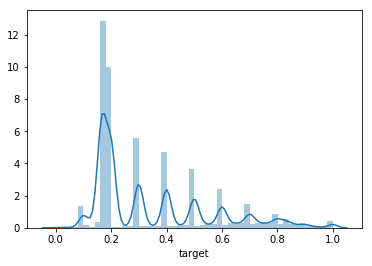

In [34]:
sns.distplot(train[train['target']!= 0].target)

### Some thoughts:
1. Many political comments, tend to get 'insult' when it comes to political comment
2. Many political comments can seem insulting to one person but not so insulting. These are the ones that are harder to predict
3. Many of the target values are below 0.5. And a lot of them are around 0.2. So the choice of 0.5 could be quite arbitrary.  It would be interesting to look at some of the lower ones.

In [35]:

i = 0

for ind, y in enumerate(train.target.tolist()):

    if 0.1< y < 0.25:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

39
Pity the menu lost so much vegan food! The Mash Tun was a favorite beer bar for all the delicious tempeh stuff.
Excited the staff is still there, can't wait to try the new beers.
id                                                                                239625
target                                                                          0.166667
comment_text                           Pity the menu lost so much vegan food! The Mas...
severe_toxicity                                                                        0
obscene                                                                                0
identity_attack                                                                        0
insult                                                                                 0
threat                                                                          0.166667
asian                                                                                NaN
atheist          

## having < 0.3 probably means only 1 annotator finds this offensive. Probably means it is not very offensive.

In [36]:

i = 0

for ind, y in enumerate(train.target.tolist()):

    if 0.25< y < 0.5:
        print(ind)
        print(train.iloc[ind,2])       
        print(train.iloc[ind,:])
        i += 1
        if i > 3:
            break

6
hahahahahahahahhha suck it.
id                                                             59861
target                                                      0.457627
comment_text                             hahahahahahahahhha suck it.
severe_toxicity                                            0.0508475
obscene                                                     0.305085
identity_attack                                                    0
insult                                                      0.254237
threat                                                             0
asian                                                            NaN
atheist                                                          NaN
bisexual                                                         NaN
black                                                            NaN
buddhist                                                         NaN
christian                                                        NaN
fema

## Make all the labels into one matrix
And analyze the correlation between them

In [23]:
train[:2]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [24]:
Targets = train[['target','severe_toxicity','obscene','identity_attack','insult','threat','sexual_explicit']]

In [25]:
Targets[:10]

,target,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.893617,0.021277,0.000000,0.021277,0.872340,0.0,0.000000
5,0.666667,0.047619,0.638095,0.000000,0.333333,0.0,0.009524
6,0.457627,0.050847,0.305085,0.000000,0.254237,0.0,0.220339
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


,target,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
target,1.000000,0.393425,0.493058,0.450017,0.928207,0.287761,0.252507
severe_toxicity,0.393425,1.000000,0.340570,0.256599,0.324847,0.277789,0.196876
obscene,0.493058,0.340570,1.000000,0.124823,0.427176,0.090928,0.333666
identity_attack,0.450017,0.256599,0.124823,1.000000,0.310748,0.146662,0.118191
insult,0.928207,0.324847,0.427176,0.310748,1.000000,0.108575,0.145127
threat,0.287761,0.277789,0.090928,0.146662,0.108575,1.000000,0.088051
sexual_explicit,0.252507,0.196876,0.333666,0.118191,0.145127,0.088051,1.000000


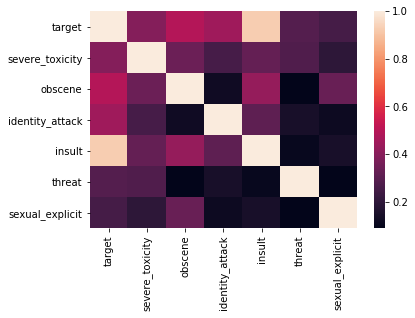

In [35]:


ax = sns.heatmap(Targets.corr(method='pearson'))

## Predict by sub categories
Here I think breaking things into sub categories make more sense as well, for example, 'religion' could be very different from 'identity_attack'

Here are sub-categories: they are not mutually exclusive
severe_toxicity  
obscene  
threat  
insult  
identity_attack  
sexual_explicit  